# Interpolation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
%matplotlib inline

### Bike drag data


|Velocity (x10 ft/s) | 0 |2|  10  |
|-------------------------|---|---|---|
|Drag (x100 lbs) | 0 |2.90 | 119|

- Plot the data
- What is the Drag if the bike is going 31 ft/s?



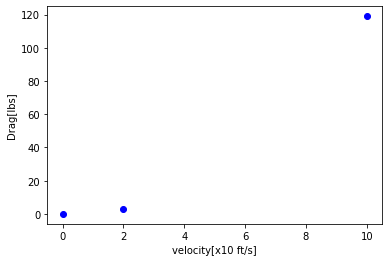

In [4]:
#plot
v = np.array([0,2.,10.])
D = np.array([0.,2.9,119.])
plt.plot(v,D,'bo');
plt.xlabel('velocity[x10 ft/s]');
plt.ylabel('Drag[lbs]');

In [5]:
#pwl
def pwl(v):
    
    if v<0:
        print("error out of domain")
        return(-1)
    elif v<=2:
        return((2.9/2.0)*(v-0) + 0)
    elif v<=10:
        return( (119.-2.9)/(10.-2.) * (v-2.) + 2.9)
    else:
        print("error out of domain")
        return(-1)

print(pwl(3.1))


18.86375


In [ ]:
#wc4pwl

In [6]:
#u bi [linterp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html)

from scipy import interpolate

dragfcn = interpolate.interp1d(v,D) #interp1d doesn't do the interpolation it returns a fcn for you to use later

print(dragfcn(3.1))

18.86375


In [9]:
#par
def sys(vec):
    a,b,c = vec[0],vec[1],vec[2]
    output = np.array([
        a*0.+b*0+c - 0,
        a*2.**2 + b*2. + c - 2.9,
        a*10.**2 + b*10. + c - 119
    ])
    return(output)
    
sol = fsolve(sys,np.array([1.,1.,0.]))
print(sol)

[ 1.30625000e+00 -1.16250000e+00  3.34851733e-27]


8.949312500000001


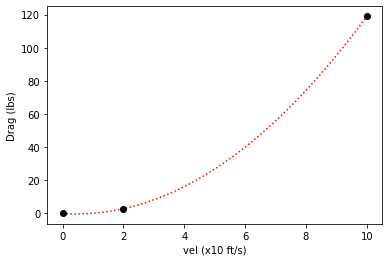

In [11]:
vs = np.linspace(0,10,101)
Ds = 1.30625*vs**2 - 1.1625*vs

plt.plot(vs,Ds,'r:');
plt.plot(v,D,'ko');
plt.xlabel('vel (x10 ft/s)');
plt.ylabel('Drag (lbs)');

print(1.30625*3.1**2 - 1.1625*3.1)

### More data


|Velocity (x10 ft/s) | 0 |2|  4  |  6 | 8 | 10 |
|-------------------------|---|---|---| --- | --- | --- |
|Drag (x100 lbs) | 0 |2.90 |14.8|  39.6 | 74.3 | 119 |

- How does the old function agree with the new data?
- Can we make a new function that interpolates all the data?

### Read in data from file 
There are many ways to read in a file with python. Here we'll use the [loadtxt](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) command in the numpy library to read in data from a tensile load test that gives data relating the stress on a steel wire and its elongation (or strain). The data will be saved right to a numpy array with this function. 
- Download the wire_stress_strain.csv file from Canvas and save it to your working directory. 
- Open it a text editor or MS Excel.
- Open the file using loadtxt.
- Plot the data.
- Plot an interpolation of the data.
- Is there an interpolation we should use over another? Is interpolation the right method here?
